In [1]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
from calculation import trapFrequency, getSubDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
label_heads = ['experiment', "ODTFactor"]

labels_inSitu = [[['inSitu', 0], [153838, 153921]],
          [['inSitu', 0], [153922, 154005]],
            [['inSitu', 1], [155465, 155534]]
                ]
# 1st run : +5GHz, in situ
# 2nd run : +1GHz, in situ
# 3rd run : +20GHz, in situ  beware: wrong detuning names, set to -5 and I forgot to turn off the ODT

labels = [[['TOF', 0], [153195, 153754]],
          [['TOF', 0], [154019, 154658]],
          [['TOF', 0], [154661, 154856]],
          [['TOF', 1], [154857, 155052]],
          [['TOF', 1], [155065, 155232]],
          [['TOF', 4], [155233, 155292]],
          [['TOF', 2], [155304, 155457]]
             ] # This is May 25th

# 1st run : +5GHz, TOF. Some atoms leaking at low lattice depth
# 2nd run : +1GHz, TOF
# 3rd run : +20GHz, TOF
# 4th run : +20GHz, TOF with ODT kept on at the regular value
# 5th run : -20GHz, TOF with ODT kept on at the regular value. Beware: the latticeDetuning was wrongly set at +20
# 6th run : -20GHz, TOF with ODT kept on at 4 times the end of evap value, points only at 0.2, 0.5 and 1mW.
                    # Final ODT 1 = 1.52 ODT2 = 1.44 ODT3 = 0.42 
# 7th run : -5GHz, TOF with ODT kept on at 2 times the end of evap value
                    # Final ODT 1 = 0.76 ODT2 = 0.72 ODT3 = 0.21 
# beware: am I loading less pancakes when I compress? Probably

excluded = []
#excluded = list(df_TOF[df_TOF["yWidth"] > 50]["imageID"]) + list(df_TOF[df_TOF["xWidth"] > 50]["imageID"])

In [3]:
"""ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth_final', 'latticeDetuning', 'compz_rotation']
fitVariables = ['nCount', 'xWidth', 'yWidth']

df = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
df_inSitu = createLabeledDataFrame_list(labels_inSitu, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df_inSitu[column] = df_inSitu[column].astype(float)
    except:
        pass

wrongDetuningNames = pd.Index(np.where(df['imageID'].isin(list(range(155065, 155232+1))))[0])
df.iloc[wrongDetuningNames, 3] = -20

wrongDetuningNames = pd.Index(np.where(df_inSitu['imageID'].isin(list(range(155465, 155534+1))))[0])
df_inSitu.iloc[wrongDetuningNames, 3] = 20

df.to_pickle('data_save_210525.pickle')
df_inSitu.to_pickle('data_save_210525_inSitu.pickle')"""

"ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth_final', 'latticeDetuning', 'compz_rotation']\nfitVariables = ['nCount', 'xWidth', 'yWidth']\n\ndf = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)\nfor column in df.columns:\n    try:\n        df[column] = df[column].astype(float)\n    except:\n        pass\ndf_inSitu = createLabeledDataFrame_list(labels_inSitu, label_heads, ciceroVariables, fitVariables)\nfor column in df.columns:\n    try:\n        df_inSitu[column] = df_inSitu[column].astype(float)\n    except:\n        pass\n\nwrongDetuningNames = pd.Index(np.where(df['imageID'].isin(list(range(155065, 155232+1))))[0])\ndf.iloc[wrongDetuningNames, 3] = -20\n\nwrongDetuningNames = pd.Index(np.where(df_inSitu['imageID'].isin(list(range(155465, 155534+1))))[0])\ndf_inSitu.iloc[wrongDetuningNames, 3] = 20\n\ndf.to_pickle('data_save_210525.pickle')\ndf_inSitu.to_pickle('data_save_210525_inSitu.pickle')"

In [4]:
df = pd.read_pickle('data_save_210525.pickle')
df_inSitu = pd.read_pickle('data_save_210525_inSitu.pickle')
df.rename(columns = {'latticeDepth_final' : 'latticeDepth'}, inplace = True)
df.rename(columns = {'compz_rotation' : 'compz'}, inplace = True)
df_inSitu.rename(columns = {'latticeDepth_final' : 'latticeDepth'}, inplace = True)
df_inSitu.rename(columns = {'compz_rotation' : 'compz'}, inplace = True)
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)
indexNames = pd.Index(np.where(df_inSitu['imageID'].isin(excluded))[0])
df_inSitu.drop(indexNames, inplace = True)

wrongDetuningNames = pd.Index(np.where(df_inSitu['imageID'].isin(list(range(155465, 155534+1))))[0])
df_inSitu.iloc[wrongDetuningNames, 3] = 20
df_inSitu['xWidth'] *= 3.45/6.66
df_inSitu['yWidth'] *= 3.45/6.66

#### Noise filtering
#indexNames = pd.Index(np.where(df['nCount'] < 4000)[0])
#df.drop(indexNames, inplace = True)
indexNames = pd.Index(np.where(df['yWidth'] > 100)[0])
df.drop(indexNames, inplace = True)


#Normalization
df['xWidth'] = df['xWidth']*(6.5/4.38)
df['yWidth'] = df['yWidth']*(6.5/4.38)
df_inSitu['xWidth'] = df_inSitu['xWidth']*(3.45/6.66)
df_inSitu['yWidth'] = df_inSitu['yWidth']*(3.45/6.66)

trapFrequency_x = 2*np.pi*70 # corrected with parametric heating measurement. Correspond to end of evap ODT1 = 0.38 / ODT2 = 0.36 / ODT3 = 0.105
trapFrequency_y = 2*np.pi*28
trapFrequency_z = 2*np.pi*50

trapFrequency_x_blue = 2*np.pi*28*np.sqrt(5/0.105) # corrected with parametric heating measurement. with 2pi
trapFrequency_y_blue = 2*np.pi*28*np.sqrt(5/0.105)
trapFrequency_z_blue = 0

aspectRatio = 162
w_741 = 27*10**(-6)
m = 164*1.67*10**(-27)
k_B = 1.38*10**(-23)
hbar = 6.626*10**(-34)/(2*np.pi)

# later do a v3 with the trapFrequency function outputing in Hz

df['trapFrequency'] = 2*np.pi*10**3*trapFrequency(df['latticeDetuning']*2*np.pi*10**9, df['latticeDepth']*10**(-3))
df['deconfiningTrapFrequency'] = np.sqrt(hbar*df['trapFrequency']/(m*w_741**2))

df['trapFrequencyPerp1'] = np.sqrt(
    (df['latticeDetuning'] > 0)*
        (trapFrequency_x_blue**2 - df['deconfiningTrapFrequency']**2)
    + (df['latticeDetuning'] < 0)*
        ((df['trapFrequency']/aspectRatio)**2 + (trapFrequency_x*np.sqrt(df['ODTFactor']))**2)
                                    )
    
df['trapFrequencyPerp2'] = np.sqrt(
    (df['latticeDetuning'] > 0)*
        (trapFrequency_x_blue**2 - df['deconfiningTrapFrequency']**2)
    + (df['latticeDetuning'] < 0)*
        ((df['trapFrequency']/aspectRatio)**2 + (trapFrequency_y*np.sqrt(df['ODTFactor']))**2)
                                    )

df_inSitu['trapFrequency'] = 2*np.pi*10**3*trapFrequency(df_inSitu['latticeDetuning']*2*np.pi*10**9, df_inSitu['latticeDepth']*10**(-3))
df_inSitu['deconfiningTrapFrequency'] = np.sqrt(hbar*df_inSitu['trapFrequency']/(m*w_741**2))
df_inSitu['trapFrequencyPerp1'] = np.sqrt(
    (df_inSitu['latticeDetuning'] > 0)*
        (trapFrequency_x_blue**2 - df_inSitu['deconfiningTrapFrequency']**2)
    + (df_inSitu['latticeDetuning'] < 0)*
        ((df_inSitu['trapFrequency']/aspectRatio)**2 + (trapFrequency_x*np.sqrt(df_inSitu['ODTFactor']))**2)
                                            )
df_inSitu['trapFrequencyPerp2'] = np.sqrt(
    (df_inSitu['latticeDetuning'] > 0)*
        (trapFrequency_x_blue**2 - df_inSitu['deconfiningTrapFrequency']**2)
    + (df_inSitu['latticeDetuning'] < 0)*
        ((df_inSitu['trapFrequency']/aspectRatio)**2 + (trapFrequency_y*np.sqrt(df_inSitu['ODTFactor']))**2)
                                            )

I computed that for a blue lattice $\omega_\perp^2 = \frac{\hbar k\sqrt{2V_{741}}}{m^{3/2}w_{741}^2} = \frac{\hbar k\sqrt{2\frac{m\omega_z^2}{2k^2}}}{m^{3/2}w_{741}^2} = \frac{\hbar\omega_z}{m w_{741}^2}$.

In [5]:
latticeDepthList = np.sort(df['latticeDepth'].unique())
BECHoldTimeList = np.sort(df['BECHoldTime'].unique())
latticeDetuningList = np.sort(df['latticeDetuning'].unique())
compzList = np.sort(df['compz'].unique())
ODTFactorList = np.sort(df['ODTFactor'].unique())
colors = ['red', 'blue', 'orange', 'black', 'green', 'pink', 'purple']

In [6]:
latticeDepthList

array([  0.2,   0.5,   1. ,   5. ,  20. ,  60. , 120. ])

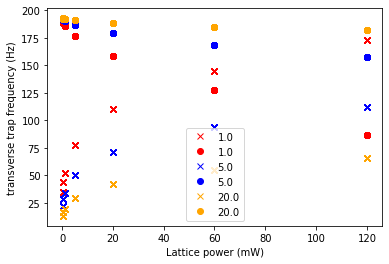

In [7]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList[2:]:
    df_temp = getSubDF(df, ['latticeDetuning'], [latticeDetuning])
    plt.plot(df_temp['latticeDepth'], df_temp['deconfiningTrapFrequency']/(2*np.pi), 'x', color = colors[i], label = latticeDetuning)
    plt.plot(df_temp['latticeDepth'], df_temp['trapFrequencyPerp1']/(2*np.pi), 'o', color = colors[i], label = latticeDetuning)
    i += 1
plt.legend()
plt.xlabel('Lattice power (mW)')
plt.ylabel('transverse trap frequency (Hz)')
plt.show()

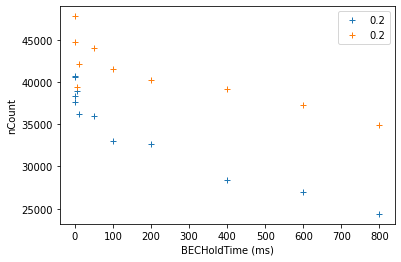

In [8]:
latticeDetuning = -20
compz = 7.4
ODTFactor = 4
plt.figure()
for latticeDepth in [0.2]:#, 20, 120]:
    for ODTFactor in [1, 4]:
        df_temp = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
        plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)))
plt.legend()
#plt.ylim(0, 5000)
#plt.ylim(0,25000)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

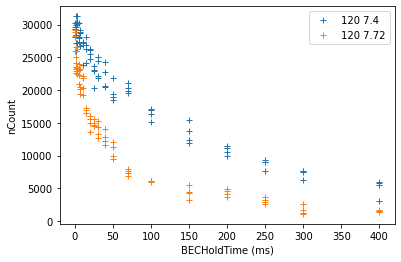

In [9]:
latticeDetuning = 1
plt.figure()
for latticeDepth in [120]:#, 20, 120]:
    df_temp_1 = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, 7.4])
    df_temp_2 = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, 7.72])
    plt.plot(df_temp_1['BECHoldTime'], df_temp_1['nCount'], '+', label = str(round(latticeDepth, 2)) + ' 7.4')
    plt.plot(df_temp_2['BECHoldTime'], df_temp_2['nCount'], '+', label = str(round(latticeDepth, 2)) + ' 7.72')
plt.legend()
#plt.ylim(0, 5000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

In [60]:
results = []
results_pure = []
results_lin = []

from scipy.optimize import curve_fit

def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def N_polarized_pure3b(t, N0, gamma):
    return N0 / np.sqrt(1+N0**2*gamma*t)

def fitRun(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    alpha_guess = 1/time_guess
    gamma_guess = 1/(N0_guess**2*time_guess)
    popt, pcov = curve_fit(N_polarized, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, alpha_guess, gamma_guess],
                          )#bounds = ((N0_guess/10, alpha_guess/10, gamma_guess/100), (N0_guess*10, alpha_guess*10, gamma_guess*100)),
                           #method = 'trf'
                      #)
    return popt, pcov

def fitRun_pure(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_polarized_pure3b, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, 1/(N0_guess**2*time_guess)],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

def fitRun_lin(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_linear, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, N0_guess/time_guess],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        if latticeDetuning > 0:
            mean_size_line = getSubDF(df_inSitu_mean, ['latticeDepth', 'latticeDetuning'], [latticeDepth, latticeDetuning])
            mean_size = ((mean_size_line['xWidth'] + mean_size_line['yWidth'])/2).mean()
        else:
            mean_size = np.nan
        for compz in compzList:
            for ODTFactor in ODTFactorList:
                df_run = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
                if not df_run.empty:
                    popt, pcov = fitRun(df_run)
                    results += [{'latticeDetuning' : latticeDetuning,
                                     'latticeDepth' : latticeDepth,
                                    'N0' : popt[0],
                                    'alpha' : min(-10**(-10), popt[1]),
                                     'gamma' : popt[2],
                                 'trapFrequency' : df_run['trapFrequency'].mean(),
                                 'trapFrequencyPerp1' : df_run['trapFrequencyPerp1'].mean(),
                                 'trapFrequencyPerp2' : df_run['trapFrequencyPerp2'].mean(),
                                 'compz' : compz,
                                 'ODTFactor' : ODTFactor,
                                'mean_size' : mean_size
                                }]
resultsDF = pd.DataFrame(results)

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        if latticeDetuning > 0:
            mean_size_line = getSubDF(df_inSitu_mean, ['latticeDepth', 'latticeDetuning'], [latticeDepth, latticeDetuning])
            mean_size = ((mean_size_line['xWidth'] + mean_size_line['yWidth'])/2).mean()
        else:
            mean_size = np.nan
        for compz in compzList:
            for ODTFactor in ODTFactorList:
                df_run = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
                if not df_run.empty:
                    popt, pcov = fitRun_pure(df_run)
                    results_pure += [{'latticeDetuning' : latticeDetuning,
                                     'latticeDepth' : latticeDepth,
                                    'N0' : popt[0],
                                    'alpha' : 0,
                                     'gamma' : popt[1],
                                      'trapFrequency' : df_run['trapFrequency'].mean(),
                                     'trapFrequencyPerp1' : df_run['trapFrequencyPerp1'].mean(),
                                     'trapFrequencyPerp2' : df_run['trapFrequencyPerp2'].mean(),
                                      'compz' : compz,
                                      'ODTFactor' : ODTFactor,
                                      'mean_size' : mean_size
                                }]
resultsDF_pure = pd.DataFrame(results_pure)

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        if latticeDetuning > 0:
            mean_size_line = getSubDF(df_inSitu_mean, ['latticeDepth', 'latticeDetuning'], [latticeDepth, latticeDetuning])
            mean_size = ((mean_size_line['xWidth'] + mean_size_line['yWidth'])/2).mean()
        else:
            mean_size = np.nan
        for compz in compzList:
            for ODTFactor in ODTFactorList:
                df_run = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
                if not df_run.empty:
                    popt, pcov = fitRun_lin(df_run[df_run['BECHoldTime']<25])
                    results_lin += [{'latticeDetuning' : latticeDetuning,
                                     'latticeDepth' : latticeDepth,
                                    'N0' : popt[0],
                                     'b' : popt[1],
                                     'trapFrequency' : df_run['trapFrequency'].mean(),
                                     'trapFrequencyPerp1' : df_run['trapFrequencyPerp1'].mean(),
                                     'trapFrequencyPerp2' : df_run['trapFrequencyPerp2'].mean(),
                                     'compz' : compz,
                                     'ODTFactor' : ODTFactor,
                                      'mean_size' : mean_size
                                }]
resultsDF_lin = pd.DataFrame(results_lin)

#print('\n')
#print(resultsDF)
#perr = np.sqrt(np.diag(pcov))

In [62]:
latticeDepth = 120
latticeDetuning = -5
compz = 7.72
ODTFactor = 2
df_tempZ = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz', 'ODTFactor'], [latticeDepth, latticeDetuning, compz, ODTFactor])
time = np.linspace(0, 800, 10000)

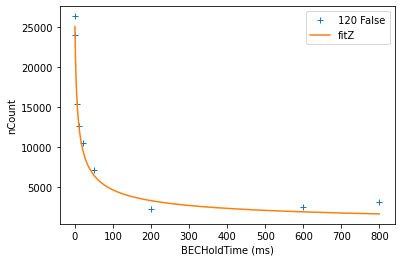

In [63]:
resultZ = getSubDF(resultsDF_pure, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0, 20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

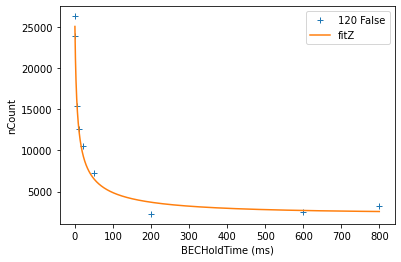

In [64]:
resultZ = getSubDF(resultsDF, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]

Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0,20000)
#plt.xlim(0,10)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

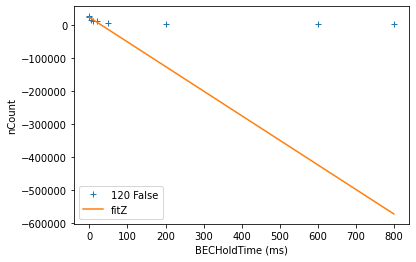

In [65]:
resultZ = getSubDF(resultsDF_lin, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])

NZ, bZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4]

Z = N_linear(time, NZ, bZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
#plt.ylim(0,20000)
#plt.xlim(0,200)
plt.xlabel('BECHoldTime (ms)')
plt.ylabel('nCount')
plt.show()

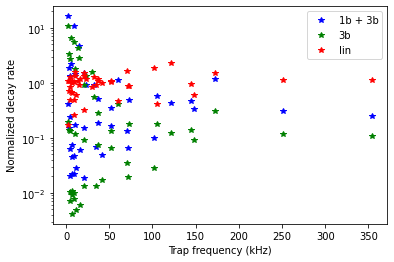

In [66]:
resultsDF_notLossy = getSubDF(resultsDF, ['compz'], [compz])
resultsDF_notLossy_pure = getSubDF(resultsDF_pure, ['compz'], [compz])
resultsDF_notLossy_lin = getSubDF(resultsDF_lin, ['compz'], [compz])

#latticePower = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
trapFrequencyList = resultsDF_notLossy['trapFrequency']/(2*np.pi*10**3)
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()

plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')
plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate")


plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

The increase in power should result in a smaller cloud. The density is proportional to $n\sim 1/(a_{oh}r_{\perp}^{2}) \sim \sqrt{\omega_{z}}\frac{\omega_{\perp}^{2}}{\mu}$. Assuming the chemical potential constant, the density $n$ goes like $(P/\Delta)^{5/4}$. In that case the decay coefficient which is proportional to $n^{2}$ should be scalled accordingly.
If we rather fix the scattering length $a$ and write $\mu\sim na$ then at constant $a$ it gives $n \sim (P/\Delta)^{5/8})$.

And $P/\Delta \propto \omega_{z}^{2}$

Note for a thermal cloud that gets compressed from $\omega_i$ to $\omega_f = k\omega_i$. $E_i = \sum \epsilon_i p_i$ and $E_f = \sum \epsilon_f p_f = \sum (k\epsilon_i) p_i = kE_i$. So the temperature goes like $T_f = kT_i$. But the probability to occupy each state remains the same, so $\omega^2 \Delta x^2/T = $ cste. There for $\Delta x_f = \Delta x_i/\sqrt{k}$. So a good proxy for the density is $n \propto 1/(a_z r^2) \propto \omega_z^{1/2} \sqrt{k}^{2} \propto \omega_z^{3/2}$. Or if we want to be more precise and take into consideration the ODT trapping, one should say $n \propto \omega_z^{1/2}\omega_{\perp,1}^{1/2}\omega_{\perp,2}^{1/2}$

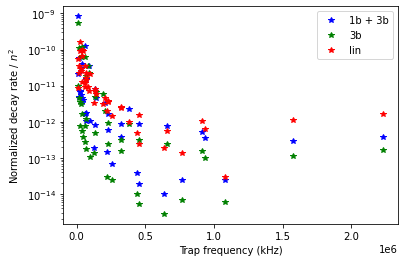

In [67]:
powerExponent = 3/2
# 3/2 for 2D thermal + 1D HO
# 5/2 for 2D BEC fixed chemical potential (wrong) + 1D HO
# 5/4 for 2D BEC fixed scattering length + 1D HO

trapFrequencyList = resultsDF_notLossy['trapFrequency']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList**2)**(powerExponent)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList**2)**(powerExponent)
### That was the previous scaling before we changed to take into account the ODT trapping

### Now it is simple n^2 \propto omega_z * omega_perp1^2 * omega_perp2^2
trapFrequencyList = resultsDF_notLossy['trapFrequency']
trapFrequencyPerp1List = resultsDF_notLossy['trapFrequencyPerp1']
trapFrequencyPerp2List = resultsDF_notLossy['trapFrequencyPerp2']
decay_1b3b = resultsDF_notLossy['gamma']/resultsDF_notLossy['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_3b = resultsDF_notLossy_pure['gamma']/resultsDF_notLossy_pure['gamma'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)
decay_lin = resultsDF_notLossy_lin['b']/resultsDF_notLossy_lin['b'].mean()/(trapFrequencyList*trapFrequencyPerp1List*trapFrequencyPerp2List)


plt.figure()
plt.semilogy(trapFrequencyList, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(trapFrequencyList, decay_3b, 'g*', label = '3b')
plt.semilogy(trapFrequencyList, decay_lin, 'r*', label = 'lin')

plt.xlabel("Trap frequency (kHz)")
plt.ylabel("Normalized decay rate / $n^2$")
plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

Let's use only the pure 3b fit

In [68]:
results = resultsDF_pure

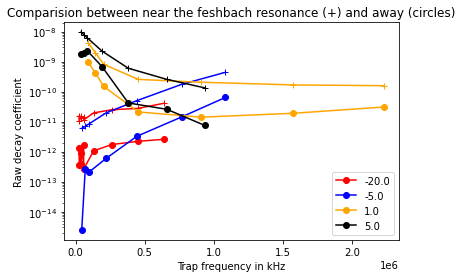

In [69]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList[:4]:
    decay_notlossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.72])
    plt.semilogy(decay_notlossy['trapFrequency'], decay_notlossy['gamma'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequency'], decay_lossy['gamma'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel('Raw decay coefficient')
plt.title('Comparision between near the feshbach resonance (+) and away (circles)')
plt.show()

The average xWidth of the cloud is 4.36 pixel and yWidth is 4.45, each are 6.5 micro meters big and magnification is 4. It makes 7 micrometers cloud size (one sigma), so approximately 40 pancakes filled.

The nCount of the previous data was accounting a 3.45 micro meters pixel and 1 magnification, this should be corrected accordingly

For the temperature : $\sigma = \sqrt{\sigma_0^{2}+(\sigma_v\tau)^2}$ with $\sigma_{0} = 7 \mu m$ and $\tau$ the time of flight. And $\sigma_{v} = \sqrt{\frac{k_{B}T}{m}}$ so $T = \frac{m}{k_{B}}\frac{\sigma^2-\sigma^2_0}{\tau^2}$

In [70]:
sigma_0 = 7

df['temperature'] = (m/k_B*(df['yWidth']**2-sigma_0**2)*(10**(-12))/(df['TOF']**2*10**(-6)))/(10**(-9)) # in nano kelvin
df

,BECHoldTime,TOF,latticeDepth,latticeDetuning,compz,nCount,xWidth,yWidth,imageID,experiment,ODTFactor,trapFrequency,deconfiningTrapFrequency,trapFrequencyPerp1,trapFrequencyPerp2,temperature
0,250.0,3.0,0.5,5.0,7.40,703.0,1.275506,9.743871,153195.0,TOF,0.0,6.026295e+04,178.409114,1200.845998,1200.845998,101.311392
1,15.0,3.0,20.0,5.0,7.72,3641.0,17.802135,23.188973,153196.0,TOF,0.0,3.811363e+05,448.675168,1128.074252,1128.074252,1077.720998
2,50.0,3.0,0.5,5.0,7.72,1327.0,11.409785,1.503073,153197.0,TOF,0.0,6.026295e+04,178.409114,1200.845998,1200.845998,-103.070551
3,50.0,3.0,0.5,5.0,7.72,2007.0,0.677146,10.718559,153198.0,TOF,0.0,6.026295e+04,178.409114,1200.845998,1200.845998,145.292049
4,150.0,3.0,0.2,5.0,7.40,1754.0,7.340429,9.286630,153199.0,TOF,0.0,3.811363e+04,141.883546,1205.707254,1205.707254,82.123203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,5.0,6.0,120.0,-5.0,7.72,15410.0,35.391758,30.275457,155453.0,TOF,2.0,1.083597e+06,756.529145,6717.725635,6693.493212,478.299486
1970,5.0,6.0,1.0,-5.0,7.40,37008.0,24.250788,24.075674,155454.0,TOF,2.0,9.891838e+04,228.575855,871.624768,659.350743,292.534522
1971,800.0,6.0,5.0,-5.0,7.40,30714.0,33.070308,32.122911,155455.0,TOF,2.0,2.211882e+05,341.800625,1500.364859,1387.843066,541.850966
1972,50.0,6.0,20.0,-5.0,7.40,34083.0,23.977580,46.313687,155456.0,TOF,2.0,4.423764e+05,483.379080,2800.663022,2742.029728,1155.476799


In [71]:
df_temperature = df.groupby(['BECHoldTime', 'trapFrequency', 'latticeDetuning', 'compz']).mean().reset_index()

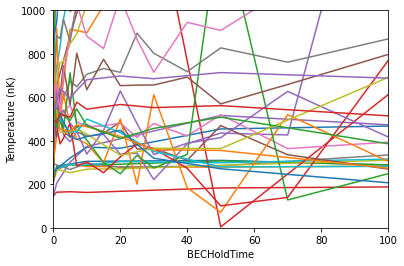

In [72]:
compz = 7.4
plt.figure()
for latticeDetuning in latticeDetuningList[-20:]:
    for latticeDepth in latticeDepthList:
        df_temp = getSubDF(df_temperature, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])
        plt.plot(df_temp['BECHoldTime'], df_temp['temperature'] )
plt.ylim(0,1000)
plt.xlim(0,100)
plt.xlabel('BECHoldTime')
plt.ylabel('Temperature (nK)')
plt.show()

The density is $N/V \simeq N/(2a_z(2a_{\perp})^2) = N/\left(8\sqrt{\hbar/(m\omega_z)}\sqrt{k_B T/m\omega_\perp^2}^{2}\right) = \frac{N m^{3/2}\omega_z^{1/2}\omega_\perp}{8\hbar^{1/2} k_B T} = \frac{N m^{3/2}\omega_z^{5/2}}{8A^2\hbar^{1/2} k_B T}$ with $A = \omega_z / \omega_\perp$ the aspect ratio (A = 162)

More precise calculation would be $P(r,z) = K e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$ and normalization condition gives for the N-particle 3D density probability $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2} \omega_z^{5/2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2}A^{2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$. And we have $\pi^{3/2}\sqrt{2} = 7.87 \simeq 8$.

Eventually we changed this analysis to take into account the ODT trapping potential and we are keeping $n(r,z) = \frac{N m \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}a_z k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}} = \frac{N m^{3/2}\omega_z^{1/2} \omega_\perp^{2}}{\pi^{3/2}\sqrt{2}\hbar^{1/2} k_B T} e^{-\frac{z^2}{2a_z^{2}}} e^{-\frac{\frac{1}{2}m\omega_\perp^2 r^{2}}{k_B T}}$

Note that here the dependance looks to be like $\omega_z^{5/2}$ but there is a dependance hidden in the temperature that should go up like $\omega$, starting from 90-200 Hz in the ODT, up to 2 kHz in the deepest lattice, so there should be a factor of 10 there.

In [73]:
results

,latticeDetuning,latticeDepth,N0,alpha,gamma,trapFrequency,trapFrequencyPerp1,trapFrequencyPerp2,compz,ODTFactor,mean_size
0,-20.0,0.2,38512.199443,0,1.340459e-12,26045.389330,468.286801,238.326165,7.40,1.0,NaN
1,-20.0,0.2,43624.119660,0,3.506878e-13,26045.389330,894.217684,386.849582,7.40,4.0,NaN
2,-20.0,0.2,40175.245331,0,1.539622e-11,26045.389330,468.286801,238.326165,7.72,1.0,NaN
3,-20.0,0.2,36205.129286,0,1.030407e-11,26045.389330,894.217684,386.849582,7.72,4.0,NaN
4,-20.0,0.5,40615.999004,0,9.314033e-13,41181.376414,508.000936,309.146864,7.40,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
85,20.0,60.0,30378.641728,0,1.078083e-10,228500.921458,1163.258706,1163.258706,7.72,1.0,2.006113
86,20.0,120.0,26919.335024,0,1.964092e-11,323149.102141,1141.568806,1141.568806,7.40,0.0,2.284635
87,20.0,120.0,29916.784270,0,7.153071e-12,323149.102141,1141.568806,1141.568806,7.40,1.0,2.284635
88,20.0,120.0,25131.814476,0,1.940449e-10,323149.102141,1141.568806,1141.568806,7.72,0.0,2.284635


In [74]:
numberOfPancakes = 40
#prefactor = m**(3/2)/(np.pi**(3/2)*np.sqrt(2)*aspectRatio**2*hbar**(1/2)*k_B)
prefactor = m**(3/2)/(np.pi**(3/2)*np.sqrt(2)*hbar**(1/2)*k_B)
# I assume here 400 nK, but eventually we should do a proper thermometry of the initial cloud.
temperature_nK = 400

#results['density'] = results['N0']/numberOfPancakes*prefactor*(2*np.pi*results['trapFrequency']*10**3)**(5/2)/(temperature_nK*10**(-9))*10**(-6)  # in atoms / cm3
trapFrequenciesProduct = results['trapFrequency']**(1/2)*results['trapFrequencyPerp1']*results['trapFrequencyPerp2']

# MODIFY THE NUMBER OF PANCAKES HERE
results['density'] = results['N0']/numberOfPancakes*prefactor*trapFrequenciesProduct/(temperature_nK*10**(-9))*10**(-6)  # in atoms / cm3

Now we can put units on the 3-body coefficient. WRONG: From the fit we get $\gamma = \beta<n^2>$. And the time unit of the fit is ms.
I keep the mistake here because it caused me some trouble. The real expression is $\beta = \gamma V^2$. Indeed $\frac{dN}{dt} = -\gamma N^3$ for the fit and $\frac{dN}{dt} = -\beta<n^2>N = -\beta/V^2 N^3$. Volume here is understood as the volume of all the pancakes combined.

In [75]:
results['beta'] = results['gamma']*10**3/(results['density']/results['N0'])**2 # this is is cm^6/s

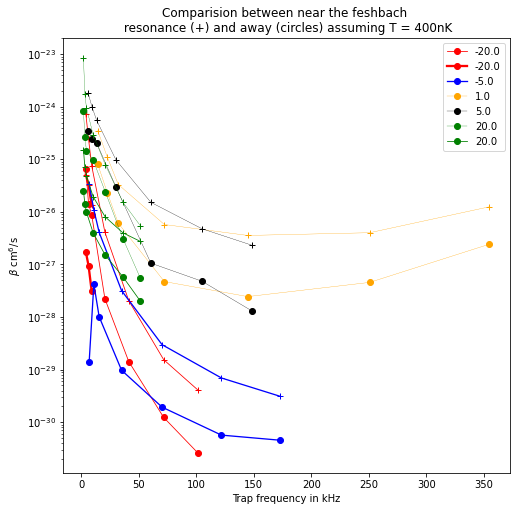

In [76]:
plt.figure(figsize = (8, 8))
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequency']/(2*np.pi*10**3), decay_notlossy_2['beta'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequency']/(2*np.pi*10**3), decay_lossy_2['beta'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) assuming T = 400nK')
plt.savefig('beta_coef.jpg', dpi = 300, transparent = False)
plt.show()

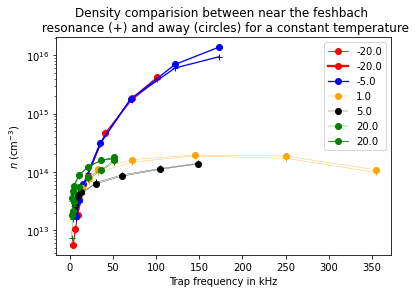

In [77]:
plt.figure()
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequency']/(2*np.pi*10**3), decay_notlossy_2['density'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequency']/(2*np.pi*10**3), decay_lossy_2['density'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ (cm$^{-3}$)')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) for a constant temperature')
plt.savefig('density.jpg', dpi = 300, transparent = False)
plt.show()

We can also do the version where we take the initial temperature of each run

In [95]:
df_initial_temperature = getSubDF(df_temperature, ['BECHoldTime'], [0]).sort_values(['latticeDetuning', 'latticeDepth', 'compz']).reset_index()
# like that the result dataframe and initial_temperature dataframe are ordered similarly
results['initialTemperature'] = df_initial_temperature['temperature']*10**(-9) # in kelvin
#results['initialDensity'] = results['N0']/numberOfPancakes*prefactor*(2*np.pi*results['trapFrequency']*10**3)**(5/2)/(results['initialTemperature'])*10**(-6)  # in atoms / cm3
results['initialDensity'] = results['N0']/numberOfPancakes*prefactor*trapFrequenciesProduct/(results['initialTemperature'])*10**(-6)  # in atoms / cm3
results['initialBeta'] = results['gamma']*10**3*3**(3/2)/(results['initialDensity']/results['N0'])**2 # this is is cm^6/s
# WRONG DEFINITION, make new notebook with the ODT calculation

In [96]:
df_size = df_inSitu.sort_values(['latticeDetuning', 'latticeDepth', 'compz']).groupby(['latticeDetuning', 'latticeDepth', 'compz']).mean().reset_index()
results_blue = results[results['latticeDetuning'] > 0].copy()
results_blue = results_blue[results_blue['ODTFactor'] == 0]
results_blue['radius'] = (df_size['xWidth'] + df_size['yWidth'])/2
results_blue['initialDensity'] = results_blue['N0']/numberOfPancakes/(2*np.pi*results_blue['radius']*10**(-6))**2/np.sqrt(hbar/(m*results_blue['trapFrequency']))*10**(-6)  # in atoms / cm3
results_blue['initialBeta'] = results_blue['gamma']*10**3/(results_blue['initialDensity']/results_blue['N0'])**2 # this is is cm^6/s
results_blue['initialDensity_size'] = results_blue['N0']/numberOfPancakes/((2*np.pi)**(3/2)*(results_blue['mean_size']*10**(-6))**2*np.sqrt(hbar/(m*results_blue['trapFrequency'])))*10**(-6)  # in atoms / cm3
results_blue['initialBeta_size'] = results_blue['gamma']*10**3*3**(3/2)/(results_blue['initialDensity_size']/results_blue['N0'])**2 # this is is cm^6/s

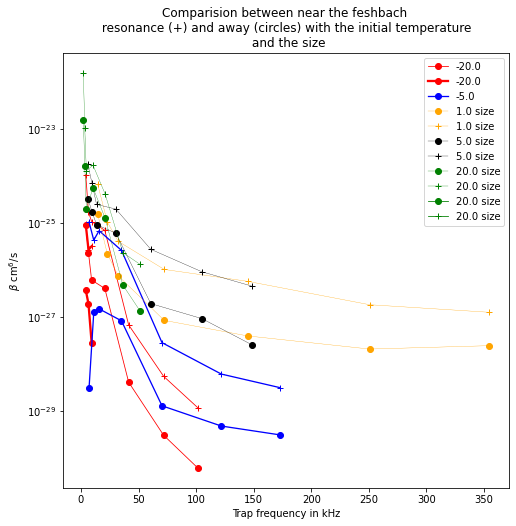

In [97]:
plt.figure(figsize = (8,8))
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        if latticeDetuning < 0:
            decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
            decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
            plt.semilogy(decay_notlossy_2['trapFrequency']/(2*np.pi*10**3), decay_notlossy_2['initialBeta'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_lossy_2['trapFrequency']/(2*np.pi*10**3), decay_lossy_2['initialBeta'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
        if latticeDetuning > 0:
            decay_blue_notlossy = getSubDF(results_blue, ['latticeDetuning', 'compz', 'ODTFactor'], [latticeDetuning, 7.4, ODTFactor])
            #plt.semilogy(decay_blue_notlossy['trapFrequency']/(2*np.pi*10**3), decay_blue_notlossy['initialBeta'], color = colors[i], marker = 'x', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_blue_notlossy['trapFrequency']/(2*np.pi*10**3), decay_blue_notlossy['initialBeta_size'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = str(latticeDetuning) + ' size')
            decay_blue_lossy = getSubDF(results_blue, ['latticeDetuning', 'compz', 'ODTFactor'], [latticeDetuning, 7.72, ODTFactor])
            #plt.semilogy(decay_blue_notlossy['trapFrequency']/(2*np.pi*10**3), decay_blue_notlossy['initialBeta'], color = colors[i], marker = 'x', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
            plt.semilogy(decay_blue_lossy['trapFrequency']/(2*np.pi*10**3), decay_blue_lossy['initialBeta_size'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2, label = str(latticeDetuning) + ' size')
            #plt.semilogy()
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) with the initial temperature \n and the size')
plt.show()

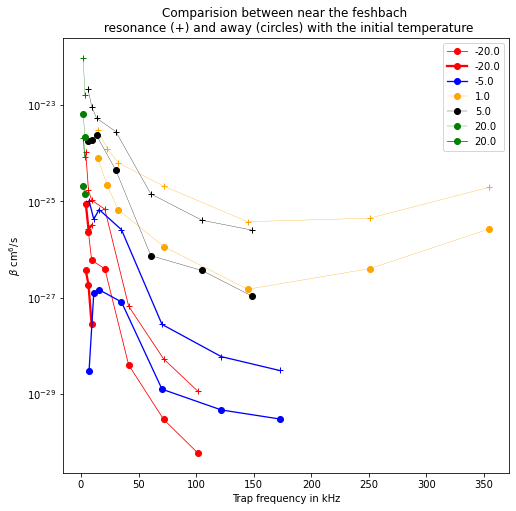

In [98]:
plt.figure(figsize = (8,8))
i = 0

for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.72])
    for ODTFactor in decay_notlossy['ODTFactor'].unique():
        decay_notlossy_2 = getSubDF(decay_notlossy, ['ODTFactor'], [ODTFactor])
        decay_lossy_2 = getSubDF(decay_lossy, ['ODTFactor'], [ODTFactor])
        plt.semilogy(decay_notlossy_2['trapFrequency']/(2*np.pi*10**3), decay_notlossy_2['initialBeta'], color = colors[i], marker = 'o', linewidth = 0.3 + ODTFactor/2, label = latticeDetuning)
        plt.semilogy(decay_lossy_2['trapFrequency']/(2*np.pi*10**3), decay_lossy_2['initialBeta'], color = colors[i], marker = '+', linewidth = 0.3 + ODTFactor/2)
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$\beta$ cm$^6/$s')
plt.title('Comparision between near the feshbach \n resonance (+) and away (circles) with the initial temperature')
plt.show()

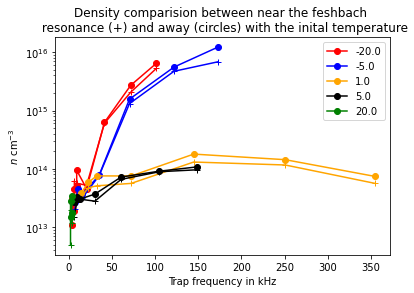

In [31]:
plt.figure()
i = 0
for latticeDetuning in latticeDetuningList:
    decay_notlossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.4])
    decay_lossy = getSubDF(results, ['latticeDetuning', 'compz'], [latticeDetuning, 7.72])
    plt.semilogy(decay_notlossy['trapFrequency']/(2*np.pi*10**3), decay_notlossy['initialDensity'], color = colors[i], marker = 'o', label = latticeDetuning)
    plt.semilogy(decay_lossy['trapFrequency']/(2*np.pi*10**3), decay_lossy['initialDensity'], color = colors[i], marker = '+')
    i += 1
plt.legend()
#plt.xlim(0,20)
plt.xlabel('Trap frequency in kHz')
plt.ylabel(r'$n$ cm$^{-3}$')
plt.title('Density comparision between near the feshbach \n resonance (+) and away (circles) with the inital temperature')
plt.show()

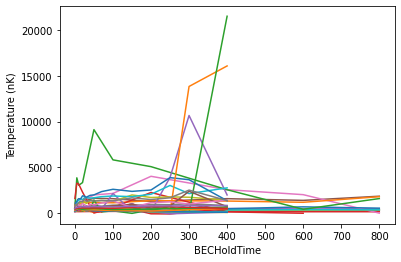

In [32]:
plt.figure()
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_temp = getSubDF(df_temperature, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])
        plt.plot(df_temp['BECHoldTime'], df_temp['temperature'] )
        #df_temp = getSubDF(df, ['latticeDepth', 'latticeDetuning', 'compz'], [latticeDepth, latticeDetuning, compz])
        #plt.plot(df_temp['BECHoldTime'], df_temp['yWidth'] )
        
#plt.ylim(0,100)
#plt.xlim(0,100)
plt.xlabel('BECHoldTime')
plt.ylabel('Temperature (nK)')
plt.show()

In [33]:
results

,latticeDetuning,latticeDepth,N0,alpha,gamma,trapFrequency,trapFrequencyPerp1,trapFrequencyPerp2,compz,ODTFactor,density,beta,initialTemperature,initialDensity,initialBeta
0,-20.0,0.2,38512.199443,0,1.340459e-12,26045.389330,468.286801,238.326165,7.40,1.0,5.568179e+12,6.412448e-26,2.075251e-07,1.073254e+13,1.726017e-26
1,-20.0,0.2,43624.119660,0,3.506878e-13,26045.389330,894.217684,386.849582,7.40,4.0,1.954984e+13,1.746173e-27,2.560356e-07,3.054238e+13,7.154316e-28
2,-20.0,0.2,40175.245331,0,1.539622e-11,26045.389330,468.286801,238.326165,7.72,1.0,5.808626e+12,7.365198e-25,2.107563e-07,1.102435e+13,2.044680e-25
3,-20.0,0.2,36205.129286,0,1.030407e-11,26045.389330,894.217684,386.849582,7.72,4.0,1.622508e+13,5.130688e-26,2.377429e-07,2.729853e+13,1.812469e-26
4,-20.0,0.5,40615.999004,0,9.314033e-13,41181.376414,508.000936,309.146864,7.40,1.0,1.039065e+13,1.423136e-26,2.226600e-07,1.866640e+13,4.409721e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,20.0,60.0,30378.641728,0,1.078083e-10,228500.921458,1163.258706,1163.258706,7.72,1.0,1.577360e+14,3.998778e-27,NaN,NaN,NaN
86,20.0,120.0,26919.335024,0,1.964092e-11,323149.102141,1141.568806,1141.568806,7.40,0.0,1.600795e+14,5.554165e-28,NaN,NaN,NaN
87,20.0,120.0,29916.784270,0,7.153071e-12,323149.102141,1141.568806,1141.568806,7.40,1.0,1.779043e+14,2.022784e-28,NaN,NaN,NaN
88,20.0,120.0,25131.814476,0,1.940449e-10,323149.102141,1141.568806,1141.568806,7.72,0.0,1.494498e+14,5.487307e-27,NaN,NaN,NaN


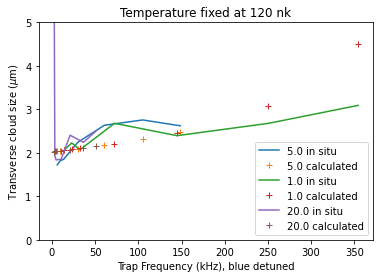

In [34]:
compz = 7.4

plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning'].unique():
    df_temp = getSubDF(df_inSitu, ['latticeDetuning', 'compz'], [latticeDetuning, compz]).groupby(['latticeDepth']).mean().reset_index()
    plt.plot(df_temp['trapFrequency']/(2*np.pi*10**3), df_temp['xWidth'], '-', label = str(latticeDetuning) + ' in situ' )
    df_temp1 = getSubDF(df, ['latticeDetuning', 'BECHoldTime'], [latticeDetuning, 30]).groupby(['latticeDepth']).mean().reset_index()
    plt.plot(df_temp1['trapFrequency']/(2*np.pi*10**3), np.sqrt(k_B*120*10**(-9)/(m*df_temp1['trapFrequencyPerp1']**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.title('Temperature fixed at 120 nk')
plt.ylim(0,5)
plt.show()

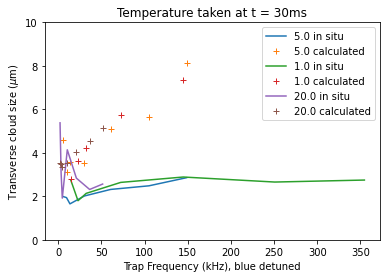

In [35]:
plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning'].unique():
    df_temp = getSubDF(df_inSitu, ['latticeDetuning'], [latticeDetuning]).groupby(['latticeDepth']).mean().reset_index()
    plt.plot(df_temp['trapFrequency']/(2*np.pi*10**3), df_temp['xWidth'], '-', label = str(latticeDetuning) + ' in situ' )
    df_temp1 = getSubDF(df, ['latticeDetuning', 'BECHoldTime'], [latticeDetuning, 30]).groupby(['latticeDepth']).mean().reset_index()
    df_temp2 = getSubDF(df_temperature, ['latticeDetuning', 'compz', 'BECHoldTime'], [latticeDetuning, compz, 30]).sort_values('latticeDepth')
    plt.plot(df_temp1['trapFrequency']/(2*np.pi*10**3), np.sqrt(k_B*df_temp2['temperature']*10**(-9)/(m*df_temp1['trapFrequencyPerp1']**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.title('Temperature taken at t = 30ms')
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.ylim(0,10)
plt.show()

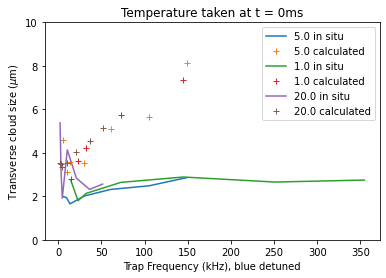

In [36]:
plt.figure()
for latticeDetuning in df_inSitu['latticeDetuning'].unique():
    df_temp = getSubDF(df_inSitu, ['latticeDetuning'], [latticeDetuning]).groupby(['latticeDepth']).mean().reset_index()
    plt.plot(df_temp['trapFrequency']/(2*np.pi*10**3), df_temp['xWidth'], '-', label = str(latticeDetuning) + ' in situ' )
    df_temp1 = getSubDF(df, ['latticeDetuning', 'BECHoldTime'], [latticeDetuning, 0]).groupby(['latticeDepth']).mean().reset_index()
    df_temp2 = getSubDF(df_temperature, ['latticeDetuning', 'compz', 'BECHoldTime'], [latticeDetuning, compz, 30]).sort_values('latticeDepth')
    plt.plot(df_temp1['trapFrequency']/(2*np.pi*10**3), np.sqrt(k_B*df_temp2['temperature']*10**(-9)/(m*df_temp1['trapFrequencyPerp1']**2))/(10**(-6)), '+', label = str(latticeDetuning) + ' calculated')
plt.legend()
plt.title('Temperature taken at t = 0ms')
plt.ylabel('Transverse cloud size ($\mu$m)')
plt.xlabel('Trap Frequency (kHz), blue detuned')
plt.ylim(0,10)
plt.show()

In [37]:
results

,latticeDetuning,latticeDepth,N0,alpha,gamma,trapFrequency,trapFrequencyPerp1,trapFrequencyPerp2,compz,ODTFactor,density,beta,initialTemperature,initialDensity,initialBeta
0,-20.0,0.2,38512.199443,0,1.340459e-12,26045.389330,468.286801,238.326165,7.40,1.0,5.568179e+12,6.412448e-26,2.075251e-07,1.073254e+13,1.726017e-26
1,-20.0,0.2,43624.119660,0,3.506878e-13,26045.389330,894.217684,386.849582,7.40,4.0,1.954984e+13,1.746173e-27,2.560356e-07,3.054238e+13,7.154316e-28
2,-20.0,0.2,40175.245331,0,1.539622e-11,26045.389330,468.286801,238.326165,7.72,1.0,5.808626e+12,7.365198e-25,2.107563e-07,1.102435e+13,2.044680e-25
3,-20.0,0.2,36205.129286,0,1.030407e-11,26045.389330,894.217684,386.849582,7.72,4.0,1.622508e+13,5.130688e-26,2.377429e-07,2.729853e+13,1.812469e-26
4,-20.0,0.5,40615.999004,0,9.314033e-13,41181.376414,508.000936,309.146864,7.40,1.0,1.039065e+13,1.423136e-26,2.226600e-07,1.866640e+13,4.409721e-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,20.0,60.0,30378.641728,0,1.078083e-10,228500.921458,1163.258706,1163.258706,7.72,1.0,1.577360e+14,3.998778e-27,NaN,NaN,NaN
86,20.0,120.0,26919.335024,0,1.964092e-11,323149.102141,1141.568806,1141.568806,7.40,0.0,1.600795e+14,5.554165e-28,NaN,NaN,NaN
87,20.0,120.0,29916.784270,0,7.153071e-12,323149.102141,1141.568806,1141.568806,7.40,1.0,1.779043e+14,2.022784e-28,NaN,NaN,NaN
88,20.0,120.0,25131.814476,0,1.940449e-10,323149.102141,1141.568806,1141.568806,7.72,0.0,1.494498e+14,5.487307e-27,NaN,NaN,NaN


### End

Now let's look at the TOF series

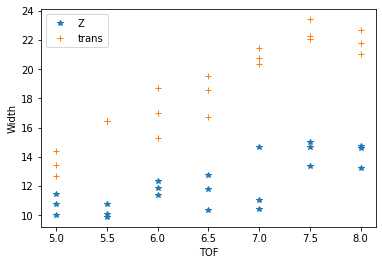

In [17]:
df_TOF
latticeDepthList_TOF = df_TOF['latticeDepth'].unique()

plt.figure()
for latticeDepth in latticeDepthList_TOF[-1:]:
    df_run = getRun(df_TOF, latticeDepth, False, -5)
    plt.plot(df_run['TOF'], df_run['xWidth'], '*', label = 'Z')
    plt.plot(df_run['TOF'], df_run['yWidth'], '+', label = 'trans')
    
plt.xlabel("TOF")
plt.ylabel("Width")
plt.legend()
plt.show()

In [18]:
def sigma(t, sigma0, v):
    return np.sqrt(sigma0**2+(v*t)**2)

def fitRun_sigma(df_run, XorY = 'xWidth'):
    sigma0_guess = df_run[XorY].min()
    v_guess = df_run[XorY].max()/df_run['TOF'].max()
    popt, pcov = curve_fit(sigma, df_run['TOF'], df_run[XorY],
                       p0 = [sigma0_guess, v_guess]
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

results_sigma = []
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df_TOF, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            print(latticeDepth)
            popt_Z, pcov_Z = fitRun_sigma(df_run, 'xWidth')
            print('xRun ok')
            popt_trans, pcov_trans = fitRun_sigma(df_run, 'yWidth')
            print('yRun ok')
            results_sigma += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'sigma0_Z' : popt_Z[0],
                            'v_Z' : popt_Z[1],
                            'sigma0_trans' : popt_trans[0],
                            'v_trans' : popt_trans[1],
                        }]
resultsDF_sigma = pd.DataFrame(results_sigma)

1.5
xRun ok
yRun ok
1.9
xRun ok
yRun ok
1.0
xRun ok
yRun ok
0.6
xRun ok
yRun ok
0.4
xRun ok
yRun ok
0.2
xRun ok
yRun ok
0.1
xRun ok


/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


yRun ok
0.05
xRun ok
yRun ok
0.03
xRun ok
yRun ok
0.02
xRun ok
yRun ok


/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [129]:
resultsDF_sigma

,latticeDetuning,latticeDepth,Y_rotation,sigma0_Z,v_Z,sigma0_trans,v_trans
0,-5.0,1.50,False,10.067422,6.900287,4.493345,4.116898
1,-5.0,1.90,False,5.445297,7.241324,0.000025,5.359775
2,-5.0,1.00,False,9.006255,5.676799,5.249421,3.642702
3,-5.0,0.60,False,6.188615,6.056395,5.061145,3.455295
4,-5.0,0.40,False,9.115527,3.656734,6.124299,3.119208
5,-5.0,0.20,False,7.110402,3.789062,5.746557,3.425045
6,-5.0,0.10,False,6.538612,2.632645,6.269707,3.436789
7,-5.0,0.05,False,7.130991,1.969506,6.243062,3.410508
8,-5.0,0.03,False,6.944506,1.819348,5.081816,3.302956
9,-5.0,0.02,False,6.460459,1.577834,-0.000140,2.869985


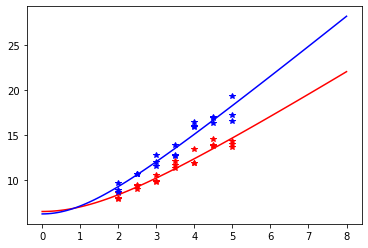

In [19]:
latticeDetuning = -5
latticeDepth = 0.1

tof = np.linspace(0, 8, 100)
df_run = getRun(df_TOF, latticeDepth, False, latticeDetuning)
df_res = getResult(resultsDF_sigma, latticeDepth, False, latticeDetuning)
sigma0_Z, v_Z, sigma0_trans, v_trans = df_res.iloc[0,3:7]
#sigma0_Z, v_Z = 8, 4
sigma_Z_fit = sigma(tof, sigma0_Z, v_Z)
sigma_trans_fit = sigma(tof, sigma0_trans, v_trans)

plt.figure()
plt.plot(tof, sigma_Z_fit, 'r-')
plt.plot(tof, sigma_trans_fit, 'b-')
plt.plot(df_run['TOF'], df_run['xWidth'], 'r*')
plt.plot(df_run['TOF'], df_run['yWidth'], 'b*')
#plt.ylim(0,2*max(sigma_Z_fit))
plt.show()

In [20]:
df_TOF[df_TOF["latticeDepth"] == 0.1]

,BECHoldTime,TOF,latticeDepth,ODT3_Comp,Y_rotation,nCount,xWidth,yWidth,imageID,latticeDetuning
126,20.0,5.0,0.1,0.0,False,95829.0,14.36020,17.22160,143500.0,-5.0
127,20.0,4.0,0.1,0.0,False,82193.0,13.43960,16.41980,143501.0,-5.0
128,20.0,3.5,0.1,0.0,False,94652.0,11.38950,12.83820,143502.0,-5.0
129,20.0,4.0,0.1,0.0,False,86989.0,11.89670,16.04810,143503.0,-5.0
130,20.0,3.0,0.1,0.0,False,90170.0,9.76909,12.81490,143504.0,-5.0
131,20.0,2.5,0.1,0.0,False,92545.0,9.49509,10.65330,143505.0,-5.0
132,20.0,4.5,0.1,0.0,False,71922.0,13.83970,17.02620,143506.0,-5.0
133,20.0,4.5,0.1,0.0,False,83637.0,14.59410,16.86500,143507.0,-5.0
134,20.0,2.0,0.1,0.0,False,76804.0,7.89393,9.64598,143508.0,-5.0
135,20.0,4.5,0.1,0.0,False,81705.0,13.93340,16.37840,143509.0,-5.0


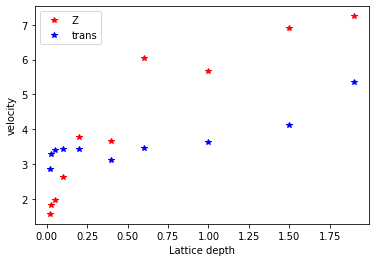

In [132]:
plt.figure()
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_Z'], 'r*', label = 'Z')
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_trans'], 'b*', label = 'trans')
plt.legend()
#plt.ylim(0, 5)
plt.ylabel("velocity")
plt.xlabel("Lattice depth")
plt.show()


# add velocity scale = hbar*k // recoil temperature

Calculate the velocity to temperature conversion. Here $\sigma = \sqrt{\sigma_0^{2}+(\sigma_{v}t)^{2}}$ is fitted from a gaussian distribution $\exp(-\frac{1}{2}\frac{x^{2}}{\sigma^{2}})$ where $x = vt$, so $v$ is distributed like a gaussian with width $\sigma_{v}$ which is the result of the fit $P(v) \sim \exp(-\frac{1}{2}\frac{v^{2}}{\sigma_{v}^{2}}) \sim \exp(-\frac{\frac{1}{2}mv^{2}}{k_{B}T})$. Therefore we find:
\[ \sigma_{v} = \sqrt{\frac{k_{B}T}{m}}\]

In [133]:
m_Dy = 164*1.66*10**(-27)
k_B = 1.38*10**(-23)
pixel_size = 3.45*10**(-6)
tof_unit = 10**(-3)
magnification = 3
resultsDF_sigma['temperature_Z'] = m_Dy*(resultsDF_sigma['v_Z']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma['temperature_trans'] = m_Dy*(resultsDF_sigma['v_trans']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma

,latticeDetuning,latticeDepth,Y_rotation,sigma0_Z,v_Z,sigma0_trans,v_trans,temperature_Z,temperature_trans
0,-5.0,1.50,False,10.067422,6.900287,4.493345,4.116898,1.242232e-06,4.421898e-07
1,-5.0,1.90,False,5.445297,7.241324,0.000025,5.359775,1.368058e-06,7.494828e-07
2,-5.0,1.00,False,9.006255,5.676799,5.249421,3.642702,8.407668e-07,3.461910e-07
3,-5.0,0.60,False,6.188615,6.056395,5.061145,3.455295,9.569669e-07,3.114861e-07
4,-5.0,0.40,False,9.115527,3.656734,6.124299,3.119208,3.488633e-07,2.538384e-07
5,-5.0,0.20,False,7.110402,3.789062,5.746557,3.425045,3.745691e-07,3.060562e-07
6,-5.0,0.10,False,6.538612,2.632645,6.269707,3.436789,1.808227e-07,3.081586e-07
7,-5.0,0.05,False,7.130991,1.969506,6.243062,3.410508,1.012006e-07,3.034636e-07
8,-5.0,0.03,False,6.944506,1.819348,5.081816,3.302956,8.635752e-08,2.846256e-07
9,-5.0,0.02,False,6.460459,1.577834,-0.000140,2.869985,6.495181e-08,2.148957e-07
